## Importing Models
* Numpy 
* Pandas 
* Matplotlib 
* Seaborn 
* Sklearn (linear regration, train-split-test, etc...)

In [63]:
import numpy as np                   # to work with all numerical data
import pandas as pd                  # to work and deal with data frame 
import matplotlib.pyplot as plt      # to work with plotting 
import seaborn as sns                # to work with plotting 
import os                            # to get all path of the operating system
import warnings                      # to remove any errors. 
# ------------------------------------------------------------------------------- #
# Now we can import all the pluge in that need 
# to work with all the projet using machine learning
# algorithms  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.impute import SimpleImputer 
from sklearn_features.transformers import DataFrameSelector 
from sklearn.metrics import accuracy_score, r2_score

In [59]:
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the data set and have an overview for the data

In [60]:
house_pricing_df = pd.read_csv("housing.csv")   # Read the dataset from csv file 

In [61]:
first5_rows = house_pricing_df.head(n=5)        # show the first 5 rows in the dataFrame
first5_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
last5_rows = house_pricing_df.tail(n=5)         # show the last 5 rows
last5_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [22]:
# allow to show up to 10 rows in a single cell
pd.options.display.min_rows = 10 

In [47]:
#Gradient background color for the numerical columns 
house_pricing_df.head(10).style.background_gradient(cmap='Reds')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000,NEAR BAY
1,-122.220000,37.860000,21.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.301400,358500.000000,NEAR BAY
2,-122.240000,37.850000,52.000000,1467.000000,190.000000,496.000000,177.000000,7.257400,352100.000000,NEAR BAY
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.000000,219.000000,5.643100,341300.000000,NEAR BAY
4,-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000,NEAR BAY
5,-122.250000,37.850000,52.000000,919.000000,213.000000,413.000000,193.000000,4.036800,269700.000000,NEAR BAY
6,-122.250000,37.840000,52.000000,2535.000000,489.000000,1094.000000,514.000000,3.659100,299200.000000,NEAR BAY
7,-122.250000,37.840000,52.000000,3104.000000,687.000000,1157.000000,647.000000,3.120000,241400.000000,NEAR BAY
8,-122.260000,37.840000,42.000000,2555.000000,665.000000,1206.000000,595.000000,2.080400,226700.000000,NEAR BAY
9,-122.250000,37.840000,52.000000,3549.000000,707.000000,1551.000000,714.000000,3.691200,261100.000000,NEAR BAY


In [62]:
# check the info of the data e.g NO. columns, NO. rows and nulls dtypes of the data 
house_pricing_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [48]:
# some statistical measurement (neam, std, min max etc)
house_pricing_df.describe().style.background_gradient(cmap='Reds')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [64]:
house_pricing_df.shape            # shape of the data (number of rows and columns)

(20640, 10)

In [65]:
# Show all columns name in the dataset
house_pricing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [57]:
# check how many null values in each column in the dataFrame
house_pricing_df.isnull().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* 'Based on the above overview of the dataset, it can be seen that the data contains 20640 entities and 10 column. the dataset contains 9 columns of float64 and 1 column object which is ocean_proximity. The column total_bedrooms contains 207 of missing values which we need to deal with it using either droping or immputaion(mean, median or mode) technuqe'

## Exploratory Data Analysis (EDA) and Creating Some visulaization for the data

In [71]:
# replacing the <1H OCEAN with 1H OCEAN
house_pricing_df['ocean_proximity'] = house_pricing_df['ocean_proximity'].replace('<H OCEAN', '1H OCEAN')

In [75]:
# get how many times each catigory repeated
ocean_value = house_pricing_df['ocean_proximity'].value_counts()
ocean_value

1H OCEAN      9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

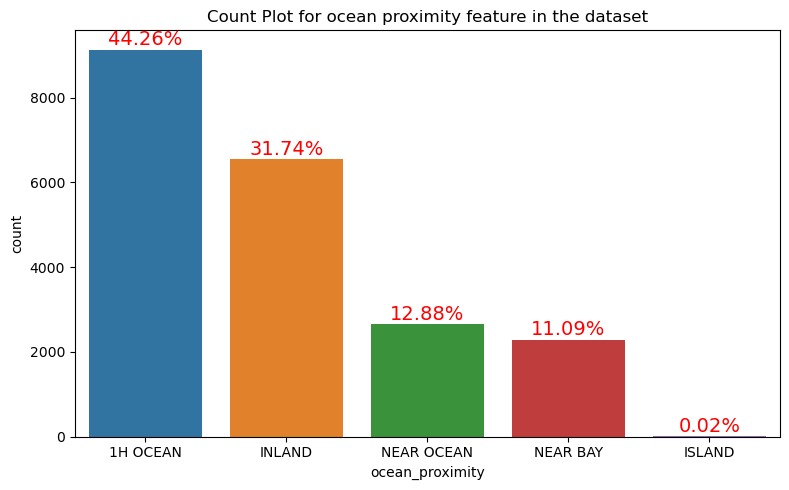

In [112]:
# visulization the ocean proximity column
plt.figure(figsize=(8, 5))
sns.countplot(x='ocean_proximity', data=house_pricing_df, order=ocean_value.index)
plt.title('Count Plot for ocean proximity feature in the dataset')
plt.tight_layout()

# get the percentage of each oceam proximity
for i in range(len(ocean_value)) :
    counter = ocean_value[i] 
    value   = f'{(counter / house_pricing_df.shape[0]) * 100:.2f}%'
    plt.text(i, counter+100, value, ha='center', color='red', fontsize=14)
    plt.tight_layout() 
 

* 'The ocean_proxmitiy column contains 5 calsses each have differnt value. 1H OCEAN repeated 9136 time, INLAND 6551, Near OCEAN 2658, NEAR BY 2290 and ISLAND 5. The 1H OCEAN contain 44.26% of the data, INLAND 31.74%, NEAR OCEAN 12.88%, NEAR BY 11.09% and ISLAND 0.02%'

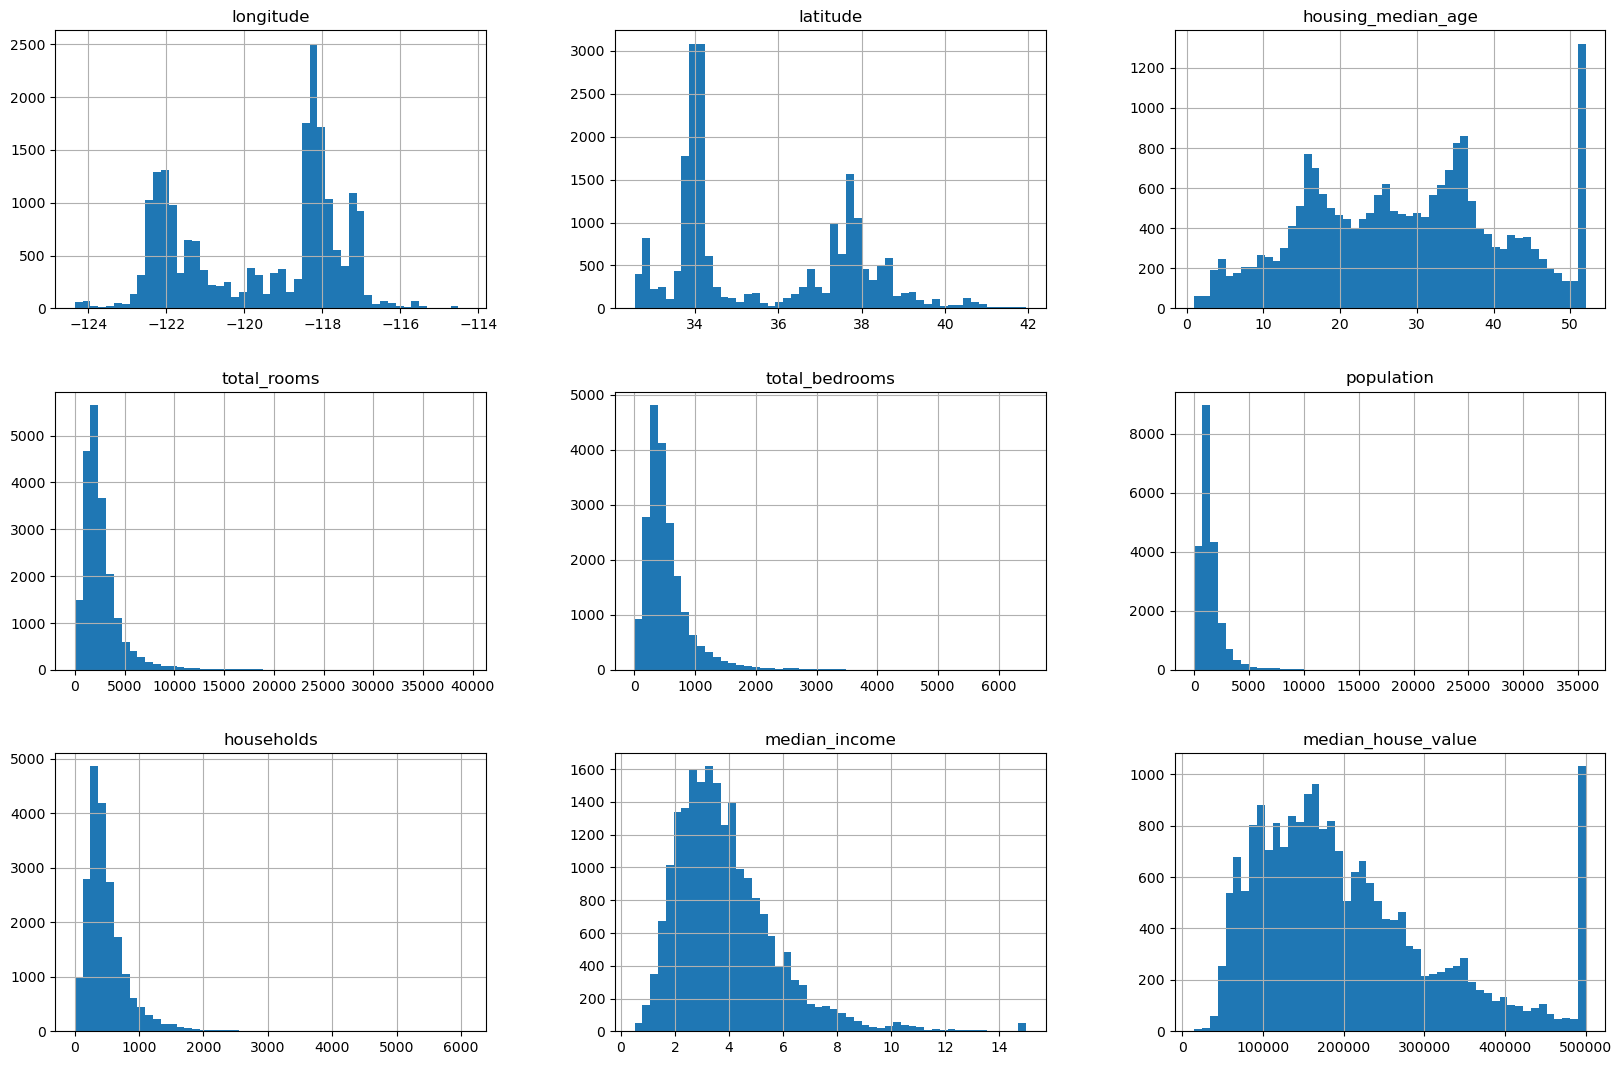

In [17]:
# histogram distrbution for the numberical data
house_pricing_df.hist(bins=50, figsize=(20,13));

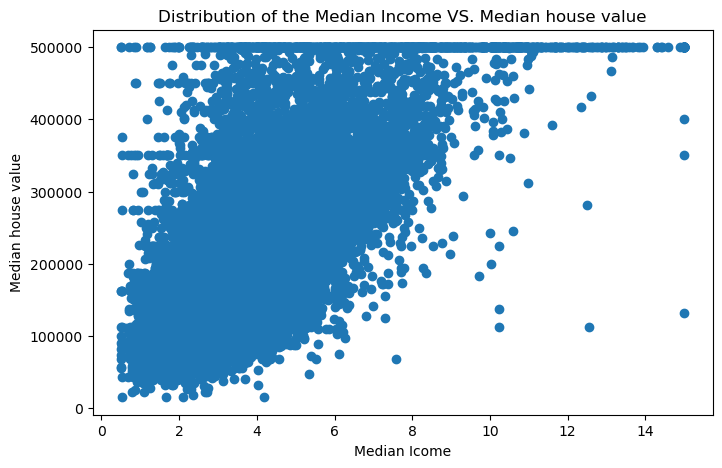

In [18]:
# scatter plot the meadian income and median house value
plt.figure(figsize=(8, 5))
plt.scatter(house_pricing_df['median_income'], house_pricing_df['median_house_value'])
plt.title('Distribution of the Median Income VS. Median house value')
plt.xlabel('Median Icome')
plt.ylabel('Median house value')
plt.show()

* 'From the scatter plot of the median_value and median_house_value, there is a linear relation between the both features'

In [21]:
house_pricing_df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
sns.distplot(x=house_pricing_df['total_bedrooms'])

* 'From the distribution above, it can be seen that there is no outliers in the data, in this case we can use mean value and replace it with the 207 missing values'

In [ ]:
house_dataset[house_dataset['bathrooms'] == house_dataset['bathrooms'].min()]

## The price for the house contain the highest number of rooms

In [ ]:
house_dataset[house_dataset['bedrooms'] == house_dataset['bathrooms'].max()]['price'].values[0]

## The total price for the house with the lowest number of rooms

In [ ]:
house_dataset[house_dataset['bedrooms'] == house_dataset['bedrooms'].min()]['price'].values[0]

## The lowes house rooms in the dataset

In [ ]:
house_dataset[house_dataset['bathrooms'] == house_dataset['bathrooms'].min()]['bedrooms'].values[0]

## The total of room in the house contains the highest number of rooms

In [ ]:
house_dataset[house_dataset['bedrooms'] == house_dataset['bedrooms'].max()]['bedrooms'].values[0]

## The total null value in each column

## Check the shape of the dataset

In [ ]:
house_dataset.shape

## Calculate the percentage of the missing data

In [ ]:
missing_percentage = (house_dataset.isna().sum().sum() / house_dataset.size) * 100

print(f'The percentage of the missing data is {missing_percentage:.2f}%')

## Get the total amount of missing data

In [ ]:
print(f'The total amount of missing data is {house_dataset.isna().sum().sum()}')

## Cleaning the missing data

In [ ]:
# display the skew to chech which statistical measurement stable for cleaning the missing data
sns.distplot(house_dataset['bedrooms'], )
plt.show()

## Replace the missing data with the mean value

In [ ]:
house_dataset_df = house_dataset.fillna(house_dataset['bedrooms'].mean(), )
house_dataset_df.isna().sum()

## The correlation between the numerical columns

In [ ]:
Correlation = house_dataset_df.corr(numeric_only='numberic')

## constructing heatmap to understand the correlation between the columns

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(Correlation, square=True, fmt='0.2f', cmap="YlGnBu", annot=True, annot_kws={'size':9}, cbar=True,)
plt.show()

## Display all the columns


In [ ]:
house_dataset_df.columns

## Histegram ploting for the columns that have higher correlations

In [ ]:
plt.hist(house_dataset_df['bedrooms'], bins=40)
plt.show()

In [ ]:
house_dataset.head(1)

In [ ]:
plt.hist(house_dataset_df['price'], bins=40)
plt.show()

In [ ]:
plt.hist(house_dataset_df['area'], bins=40)
plt.show()

In [ ]:
plt.hist(house_dataset_df['bathrooms'], bins=40)
plt.show()

In [ ]:
plt.hist(house_dataset_df['stories'])
plt.show()

In [ ]:
plt.hist(house_dataset_df['mainroad'])
plt.show()

In [ ]:
plt.hist(house_dataset_df['guestroom'])
plt.show() 

In [ ]:
plt.hist(house_dataset_df['basement'])
plt.show()

In [ ]:
plt.hist(house_dataset_df['hotwaterheating'])
plt.show()

In [ ]:
plt.hist(house_dataset_df['airconditioning'])
plt.show()

In [ ]:
plt.hist(house_dataset_df['parking'])
plt.show()

In [ ]:
plt.hist(house_dataset_df['prefarea'])
plt.show()

In [ ]:
plt.hist(house_dataset_df['furnishingstatus'])
plt.show()

## Sprate the datainto train and test

In [ ]:
sns.boxplot(data=house_dataset, y="area")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(x=house_dataset['price'], notch=True)
plt.ylabel('price')

In [ ]:
sns.displot(data=house_dataset, x='price', kde=True)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.scatterplot(ax=axes[0], data=house_dataset, x='area', y='price', hue='mainroad', size="stories", sizes=(10, 200), alpha=0.2)
axes[0].legend(loc='center left', prop={'size': 8})
markers = {'no':'X', 'yes':'o'}
sns.scatterplot(ax=axes[1], data=house_dataset, x='area', y='price', style='mainroad', markers=markers, alpha=0.2)
plt.tight_layout()
plt.show()

## chech the null values

In [ ]:
house_dataset.isna().sum()

## display the colu data

In [ ]:
cols=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
le=LabelEncoder()
for col in cols:
    house_dataset[col]=le.fit_transform(house_dataset[col])

## Spreate X and y and train test.

In [ ]:
X=house_dataset.drop('price',axis=1)
y=house_dataset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Use leiner regration model

In [ ]:
model=LinearRegression().fit(X_train,y_train)

## Product the result

In [ ]:
predictions=model.predict(X_test)

## Visulaie the data

In [ ]:
plt.scatter(y_test,predictions)
plt.show()

In [ ]:
predictions